In [1]:

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)#ustawienie wielkości okna plt
X_BEST_VALUE = 5


In [2]:

#https://github.com/CSSEGISandData/COVID-19/blob/master/archived_data/archived_time_series/time_series_2019-ncov-Confirmed.csv
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/5e4f141d2a729e636902cec85358e6b1a9944527/archived_data/archived_time_series/time_series_2019-ncov-Confirmed.csv')
#usuniecie niepotrzebnych kolumn
data = data.drop(['Lat', 'Long', 'Province/State'], axis=1)
data = data.groupby('Country/Region', as_index=False).sum()

countries_last_day = data[['Country/Region', data.columns[-1]]]
sort_country_per_cases = countries_last_day.sort_values(countries_last_day.columns[-1], ascending = False)
print('Największa ilość potwierdzonych przypadków covid')
sort_country_per_cases.head(10)


Największa ilość potwierdzonych przypadków covid


,Country/Region,2/14/20 11:23
12,Mainland China,63866
15,Others,218
18,Singapore,67
7,Hong Kong,56
24,Thailand,33
10,Japan,29
19,South Korea,28
13,Malaysia,19
23,Taiwan,18
28,Vietnam,16


krzywa zachorowan


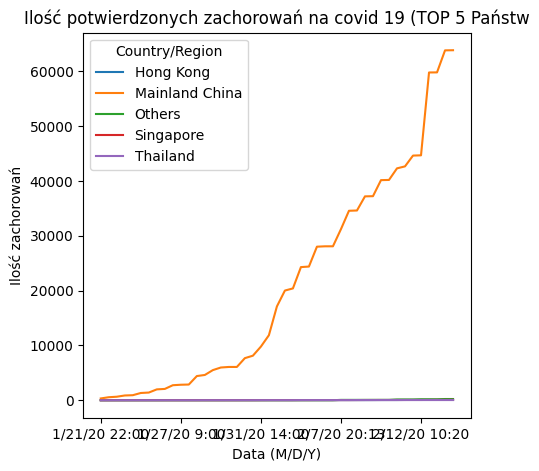

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Hong Kong,0.0,0.0,2.0,2.0,2.0,5.0,5.0,5.0,8.0,8.0,...,36.0,38.0,38.0,49.0,49.0,50.0,50.0,53.0,53,56
Mainland China,325.0,547.0,639.0,865.0,916.0,1320.0,1399.0,1979.0,2062.0,2737.0,...,40160.0,40196.0,42310.0,42670.0,44641.0,44687.0,59805.0,59823.0,63841,63866
Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,135.0,135.0,135.0,175.0,175.0,175.0,218,218
Singapore,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,4.0,...,43.0,43.0,45.0,45.0,47.0,47.0,50.0,58.0,58,67
Thailand,2.0,2.0,3.0,4.0,5.0,5.0,7.0,7.0,8.0,8.0,...,32.0,32.0,32.0,32.0,33.0,33.0,33.0,33.0,33,33


In [3]:
#krzywa zachorowań
print("krzywa zachorowan")

#wyliczenie danych do krzywej zachorowan
# for it in data.columns[4:]:
#     print(data[it].values)
the_best_X = data.loc[data['Country/Region'].isin(sort_country_per_cases.head(X_BEST_VALUE)['Country/Region'].values)]
the_best_X = the_best_X.set_index('Country/Region')
the_best_X_t = the_best_X.T
the_best_X_t.plot(xlabel='Data (M/D/Y)', ylabel='Ilość zachorowań', title='Ilość potwierdzonych zachorowań na covid 19 (TOP 5 Państw')
plt.show()
the_best_X.head(X_BEST_VALUE)


Największa ilość potwierdzonych przypadków covid nie uwzględniając Chin


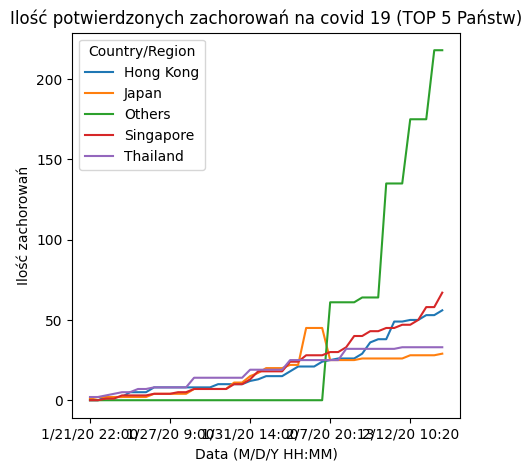

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Hong Kong,0.0,0.0,2.0,2.0,2.0,5.0,5.0,5.0,8.0,8.0,...,36.0,38.0,38.0,49.0,49.0,50.0,50.0,53.0,53,56
Japan,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,...,26.0,26.0,26.0,26.0,26.0,28.0,28.0,28.0,28,29
Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,135.0,135.0,135.0,175.0,175.0,175.0,218,218
Singapore,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,4.0,...,43.0,43.0,45.0,45.0,47.0,47.0,50.0,58.0,58,67
Thailand,2.0,2.0,3.0,4.0,5.0,5.0,7.0,7.0,8.0,8.0,...,32.0,32.0,32.0,32.0,33.0,33.0,33.0,33.0,33,33


In [4]:

#wyliczenie danych do krzywej zachorowan
# for it in data.columns[4:]:
#     print(data[it].values)
print('Największa ilość potwierdzonych przypadków covid nie uwzględniając Chin')
sort_country_per_cases.head(10)

the_best_X_without_china = data.loc[data['Country/Region'].isin(sort_country_per_cases[1:].head(X_BEST_VALUE)['Country/Region'].values)]
the_best_X_without_china = the_best_X_without_china.set_index('Country/Region')
the_best_X_without_china_t = the_best_X_without_china.T
the_best_X_without_china_t.plot(xlabel='Data (M/D/Y HH:MM)', ylabel='Ilość zachorowań', title=f'Ilość potwierdzonych zachorowań na covid 19 (TOP {X_BEST_VALUE} Państw)')
plt.show()
the_best_X_without_china.head(X_BEST_VALUE)


C:\Users\pegga\AppData\Local\Temp\ipykernel_20584\3467568692.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  local_list = val[country].iteritems()
C:\Users\pegga\AppData\Local\Temp\ipykernel_20584\3467568692.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  columns = [day[0] for day in val_w.head(1).iteritems()]


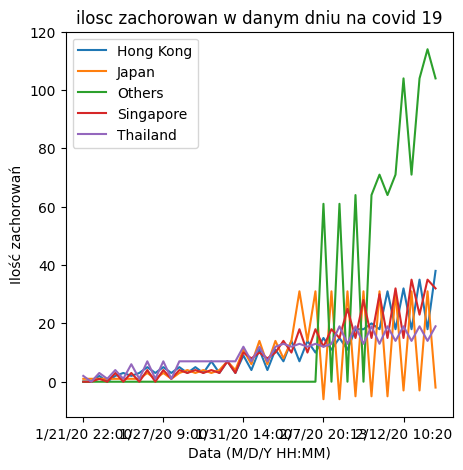

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
Hong Kong,0.0,0.0,2.0,0.0,2.0,3.0,2.0,3.0,5.0,3.0,...,18.0,20.0,18.0,31.0,18.0,32.0,18.0,35.0,18.0,38.0
Japan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,31.0,-5.0,31.0,-5.0,31.0,-3.0,31.0,-3.0,31.0,-2.0
Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,64.0,71.0,64.0,71.0,104.0,71.0,104.0,114.0,104.0
Singapore,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,4.0,0.0,...,28.0,15.0,30.0,15.0,32.0,15.0,35.0,23.0,35.0,32.0
Thailand,2.0,0.0,3.0,1.0,4.0,1.0,6.0,1.0,7.0,1.0,...,13.0,19.0,13.0,19.0,14.0,19.0,14.0,19.0,14.0,19.0


In [5]:
def make_plot_for_list(val, val_w):
    disease_curve_dict = {}
    for country in val:
        
        value_per_day = []
        local_list = val[country].iteritems()
        for it in local_list:
            if(len(value_per_day) > 0 and it[1] > 0):
                value_per_day.append(it[1] - value_per_day[-1])
            else:
                value_per_day.append(it[1])

        disease_curve_dict[country] = value_per_day
    columns = [day[0] for day in val_w.head(1).iteritems()]

    disease_curve_data = pd.DataFrame.from_dict(disease_curve_dict, orient='index', columns=columns)
    disease_curve_data_t = disease_curve_data.T
    disease_curve_data_t.plot(xlabel='Data (M/D/Y HH:MM)', ylabel='Ilość zachorowań', title='ilosc zachorowan w danym dniu na covid 19')
    
    plt.show()
    return disease_curve_data

to_head = make_plot_for_list(the_best_X_without_china_t, the_best_X_without_china)
to_head.head(X_BEST_VALUE)

C:\Users\pegga\AppData\Local\Temp\ipykernel_20584\2227821866.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  local_list = val[country].iteritems()
C:\Users\pegga\AppData\Local\Temp\ipykernel_20584\2227821866.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  columns = [day[0] for day in val_w.head(1).iteritems()]


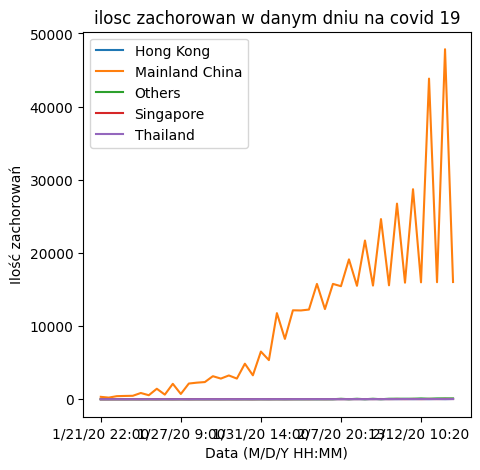

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
Hong Kong,0.0,0.0,2.0,0.0,2.0,3.0,2.0,3.0,5.0,3.0,...,18.0,20.0,18.0,31.0,18.0,32.0,18.0,35.0,18.0,38.0
Mainland China,325.0,222.0,417.0,448.0,468.0,852.0,547.0,1432.0,630.0,2107.0,...,24624.0,15572.0,26738.0,15932.0,28709.0,15978.0,43827.0,15996.0,47845.0,16021.0
Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,64.0,71.0,64.0,71.0,104.0,71.0,104.0,114.0,104.0
Singapore,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,4.0,0.0,...,28.0,15.0,30.0,15.0,32.0,15.0,35.0,23.0,35.0,32.0
Thailand,2.0,0.0,3.0,1.0,4.0,1.0,6.0,1.0,7.0,1.0,...,13.0,19.0,13.0,19.0,14.0,19.0,14.0,19.0,14.0,19.0


In [6]:
def make_plot_for_list(val, val_w):
    disease_curve_dict = {}
    for country in val:
        
        value_per_day = []
        local_list = val[country].iteritems()
        for it in local_list:
            if(len(value_per_day) > 0 and it[1] > 0):
                value_per_day.append(it[1] - value_per_day[-1])
            else:
                value_per_day.append(it[1])

        disease_curve_dict[country] = value_per_day
    columns = [day[0] for day in val_w.head(1).iteritems()]

    disease_curve_data = pd.DataFrame.from_dict(disease_curve_dict, orient='index', columns=columns)
    disease_curve_data_t = disease_curve_data.T
    disease_curve_data_t.plot(xlabel='Data (M/D/Y HH:MM)', ylabel='Ilość zachorowań', title='ilosc zachorowan w danym dniu na covid 19')
    
    plt.show()
    return disease_curve_data
to_head = make_plot_for_list(the_best_X_t, the_best_X)
to_head.head(X_BEST_VALUE)